In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import yfinance as yf
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Zamyad.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,TICKER,Date,FIRST,HIGH,LOW,Close,VALUE,Volum,OPENINT,PER,OPEN,LAST
2014-01-01,Zamyad,1/1/2014,2240,2256,2111,2195,3.550887e+10,16179545,2239,D,2170,2150
2014-01-04,Zamyad,1/4/2014,2180,2199,2108,2118,3.670972e+10,17329919,1544,D,2195,2108
2014-01-05,Zamyad,1/5/2014,2117,2130,2059,2085,4.309078e+10,20666312,2120,D,2118,2068
2014-01-06,Zamyad,1/6/2014,2100,2168,2100,2162,4.639509e+10,21459385,2023,D,2085,2159
2014-01-07,Zamyad,1/7/2014,2160,2196,2081,2134,5.592046e+10,26206754,2807,D,2162,2100
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-08,Zamyad,8/8/2023,7360,7540,7210,7290,5.840000e+11,80097596,4829,D,7580,7230
2023-08-09,Zamyad,8/9/2023,7310,7310,6980,7060,4.280000e+11,60639858,4720,D,7290,7000
2023-08-12,Zamyad,8/12/2023,6910,7000,6710,6750,1.240000e+11,18419726,1279,D,7060,6710
2023-08-13,Zamyad,8/13/2023,6420,6670,6420,6460,9.340000e+11,144668749,5991,D,6750,6560


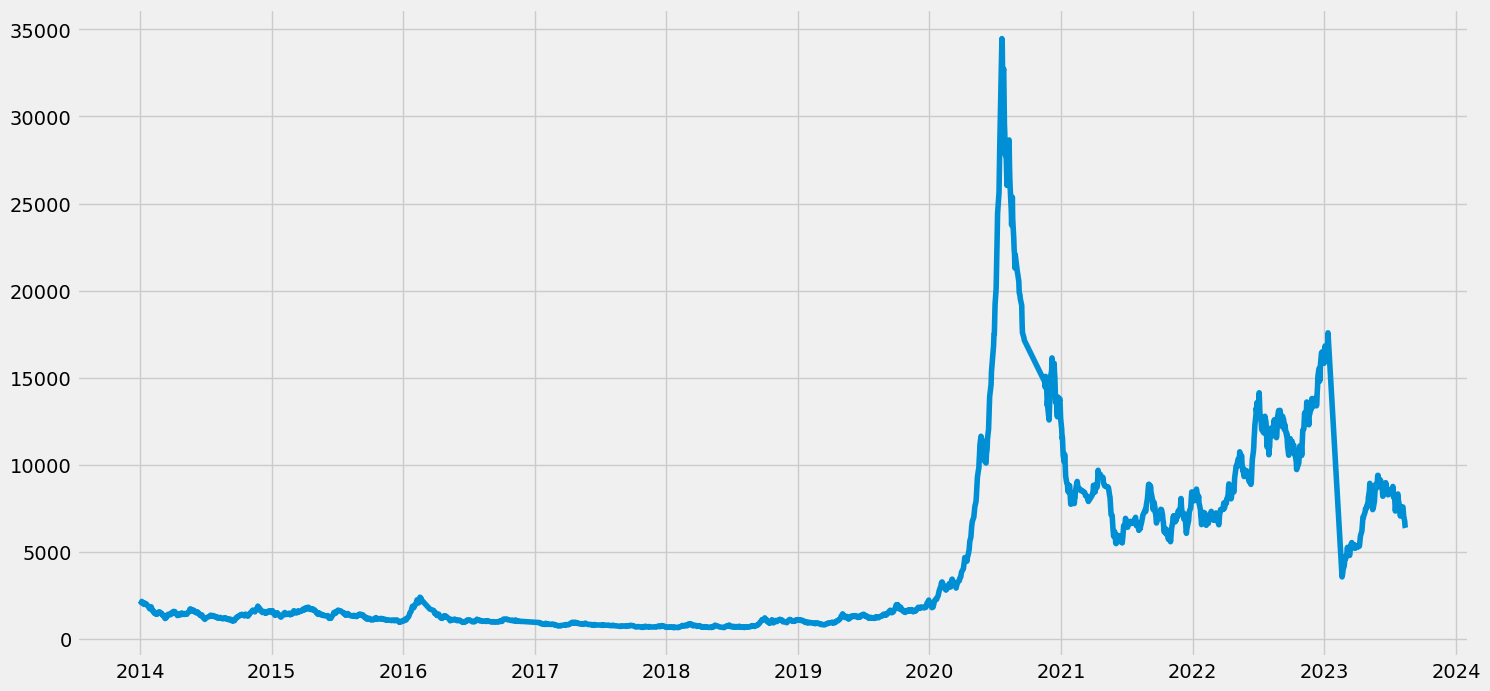

In [3]:
df=df[['Close']]
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.show()

In [4]:
data=df.filter(['Close'])
dataset=data.values
dataset

array([[2195],
       [2118],
       [2085],
       ...,
       [6750],
       [6460],
       [6380]], dtype=int64)

In [5]:
training_data_len=math.ceil(len(dataset)*0.7)


In [6]:
training_data=dataset[0:training_data_len , :]
training_data

array([[ 2195],
       [ 2118],
       [ 2085],
       ...,
       [25890],
       [24600],
       [23760]], dtype=int64)

In [7]:
xtrain=[]
ytrain=[]
n = 1

In [8]:
for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , 0])
    ytrain.append(training_data[i,0])
xtrain

[array([2195], dtype=int64),
 array([2118], dtype=int64),
 array([2085], dtype=int64),
 array([2162], dtype=int64),
 array([2134], dtype=int64),
 array([2099], dtype=int64),
 array([2068], dtype=int64),
 array([1991], dtype=int64),
 array([2069], dtype=int64),
 array([2068], dtype=int64),
 array([2029], dtype=int64),
 array([2022], dtype=int64),
 array([1962], dtype=int64),
 array([1953], dtype=int64),
 array([1916], dtype=int64),
 array([1856], dtype=int64),
 array([1802], dtype=int64),
 array([1765], dtype=int64),
 array([1736], dtype=int64),
 array([1787], dtype=int64),
 array([1853], dtype=int64),
 array([1788], dtype=int64),
 array([1719], dtype=int64),
 array([1672], dtype=int64),
 array([1610], dtype=int64),
 array([1600], dtype=int64),
 array([1536], dtype=int64),
 array([1478], dtype=int64),
 array([1470], dtype=int64),
 array([1419], dtype=int64),
 array([1454], dtype=int64),
 array([1487], dtype=int64),
 array([1433], dtype=int64),
 array([1460], dtype=int64),
 array([1518],

In [9]:
 ytrain

[2118,
 2085,
 2162,
 2134,
 2099,
 2068,
 1991,
 2069,
 2068,
 2029,
 2022,
 1962,
 1953,
 1916,
 1856,
 1802,
 1765,
 1736,
 1787,
 1853,
 1788,
 1719,
 1672,
 1610,
 1600,
 1536,
 1478,
 1470,
 1419,
 1454,
 1487,
 1433,
 1460,
 1518,
 1570,
 1557,
 1553,
 1531,
 1491,
 1443,
 1438,
 1383,
 1387,
 1341,
 1288,
 1238,
 1197,
 1179,
 1226,
 1275,
 1306,
 1358,
 1412,
 1448,
 1392,
 1429,
 1484,
 1536,
 1592,
 1560,
 1514,
 1569,
 1511,
 1456,
 1430,
 1373,
 1348,
 1392,
 1380,
 1432,
 1459,
 1411,
 1395,
 1450,
 1501,
 1464,
 1411,
 1439,
 1461,
 1412,
 1448,
 1468,
 1455,
 1434,
 1422,
 1473,
 1514,
 1562,
 1624,
 1686,
 1726,
 1735,
 1693,
 1627,
 1609,
 1661,
 1649,
 1586,
 1555,
 1541,
 1501,
 1510,
 1567,
 1550,
 1519,
 1473,
 1415,
 1401,
 1352,
 1378,
 1398,
 1377,
 1330,
 1279,
 1235,
 1191,
 1150,
 1131,
 1168,
 1210,
 1321,
 1373,
 1344,
 1309,
 1306,
 1351,
 1298,
 1282,
 1305,
 1257,
 1227,
 1251,
 1220,
 1213,
 1210,
 1204,
 1245,
 1242,
 1219,
 1185,
 1184,
 1180,
 1159,

In [10]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [11]:
test_data=dataset[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len : , :]
for i in range(n , len(test_data)):
    xtest.append(test_data[i-n : i , 0])
ytest   

array([[25370],
       [24110],
       [22960],
       [22340],
       [22110],
       [21300],
       [22060],
       [21220],
       [21060],
       [20950],
       [20520],
       [19900],
       [19810],
       [19780],
       [19540],
       [19250],
       [19150],
       [18200],
       [17590],
       [17310],
       [17170],
       [17120],
       [14760],
       [14460],
       [15080],
       [14580],
       [13940],
       [13390],
       [13680],
       [13150],
       [12580],
       [13160],
       [13810],
       [14500],
       [15050],
       [15400],
       [16140],
       [15810],
       [15220],
       [15290],
       [15830],
       [15290],
       [15020],
       [14270],
       [13580],
       [13530],
       [13000],
       [12760],
       [13250],
       [13890],
       [13670],
       [13730],
       [13790],
       [13190],
       [12670],
       [12040],
       [11530],
       [11580],
       [11080],
       [10560],
       [10170],
       [10610],
       [

In [12]:
lrconf=lr.score(xtest,ytest)
print('LR confidence: ',lrconf)

LR confidence:  0.9637550931735576


In [13]:
lrpred= lr.predict(xtest)
print('LR Method Predictions : ' ,lrpred)

LR Method Predictions :  [23969.28048955 25593.68302915 24322.41147642 23162.12394813
 22536.57762853 22304.52012288 21487.27412469 22254.07283904
 21406.55847055 21245.12716227 21134.14313782 20700.29649681
 20074.75017721 19983.9450663  19953.676696   19711.52973358
 19418.93548731 19318.04091964 18359.5425267  17744.08566387
 17461.58087438 17320.32847963 17269.88119579 14888.76939861
 14586.08569558 15211.63201518 14707.15917679 14061.43394366
 13506.51382144 13799.1080677  13264.36685901 12689.26782325
 13274.45631578 13930.27100568 14626.44352265 15181.36364488
 15534.49463175 16281.11443256 15948.16235922 15352.88440993
 15423.5106073  15968.34127276 15423.5106073  15151.09527457
 14394.38601699 13698.21350002 13647.76621618 13113.0250075
 12870.87804507 13365.26142669 14010.98665982 13789.01861093
 13849.55535154 13910.09209214 13304.72468608 12780.07293416
 12144.4371578  11629.87486264 11680.32214648 11175.8493081
 10651.19755617 10257.70874223 10701.64484001 10388.87168021
 

In [14]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Prediction']=lrpred
valid

C:\Users\Hannane\AppData\Local\Temp\ipykernel_13512\1242624568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=lrpred


,Close,Prediction
2020-08-18,25370,23969.280490
2020-08-19,24110,25593.683029
2020-08-22,22960,24322.411476
2020-08-23,22340,23162.123948
2020-08-24,22110,22536.577629
...,...,...
2023-08-08,7290,7644.539439
2023-08-09,7060,7351.945193
2023-08-12,6750,7119.887687
2023-08-13,6460,6807.114528


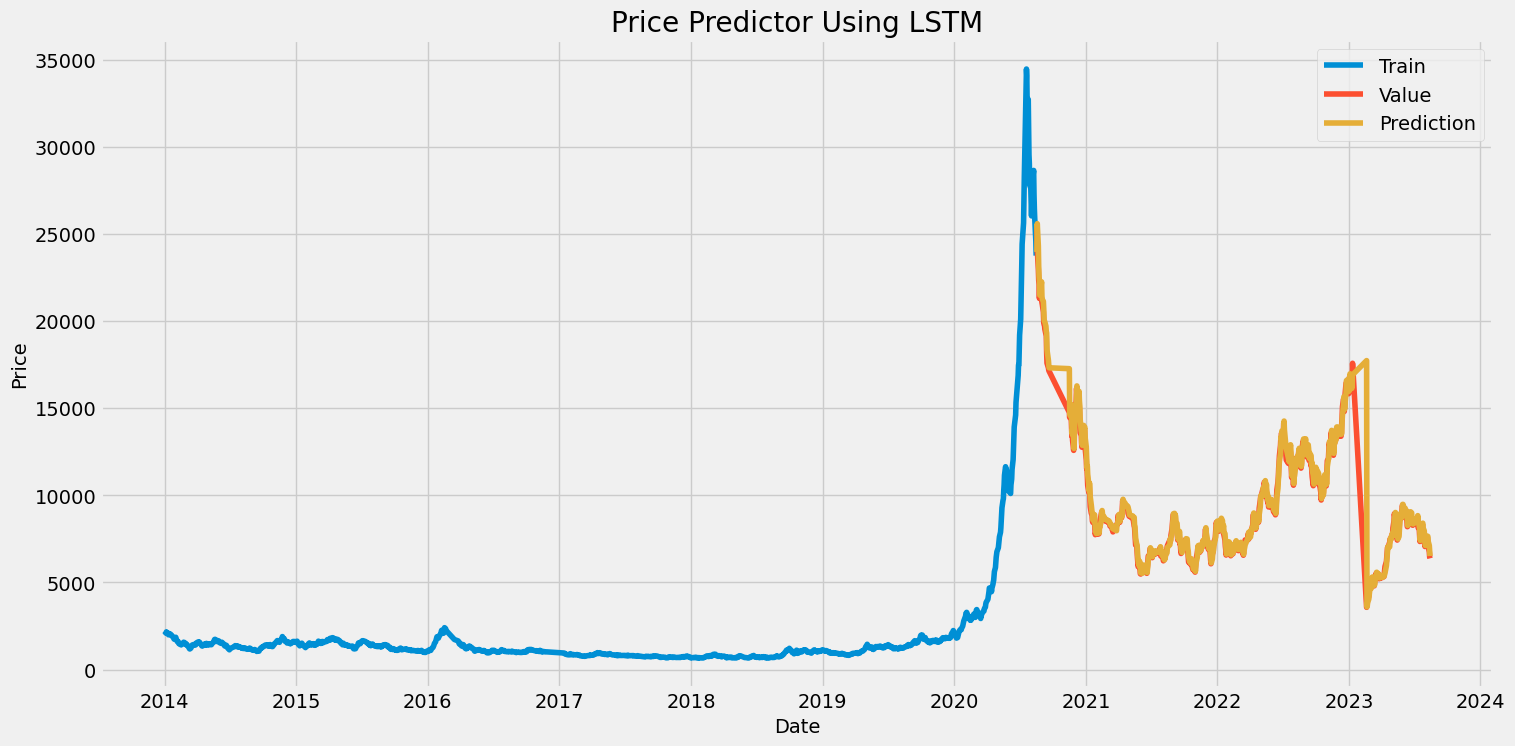

In [15]:
plt.figure(figsize=(16,8))
plt.title('Price Predictor Using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Value','Prediction'])
plt.show()

In [178]:
from sklearn.metrics import r2_score
score = r2_score(valid['Close'], valid["Prediction"])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 96.0%


In [122]:

tree=DecisionTreeRegressor().fit(xtrain,ytrain)
treered=tree.predict(xtest)

In [123]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Prediction']=treered
valid

C:\Users\Hannane\AppData\Local\Temp\ipykernel_11852\2577622836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=treered


,Close,Prediction
2020-08-18,25370,23760.0
2020-08-19,24110,26910.0
2020-08-22,22960,23760.0
2020-08-23,22340,23760.0
2020-08-24,22110,23260.0
...,...,...
2023-08-08,7290,8487.0
2023-08-09,7060,8487.0
2023-08-12,6750,8487.0
2023-08-13,6460,8129.0


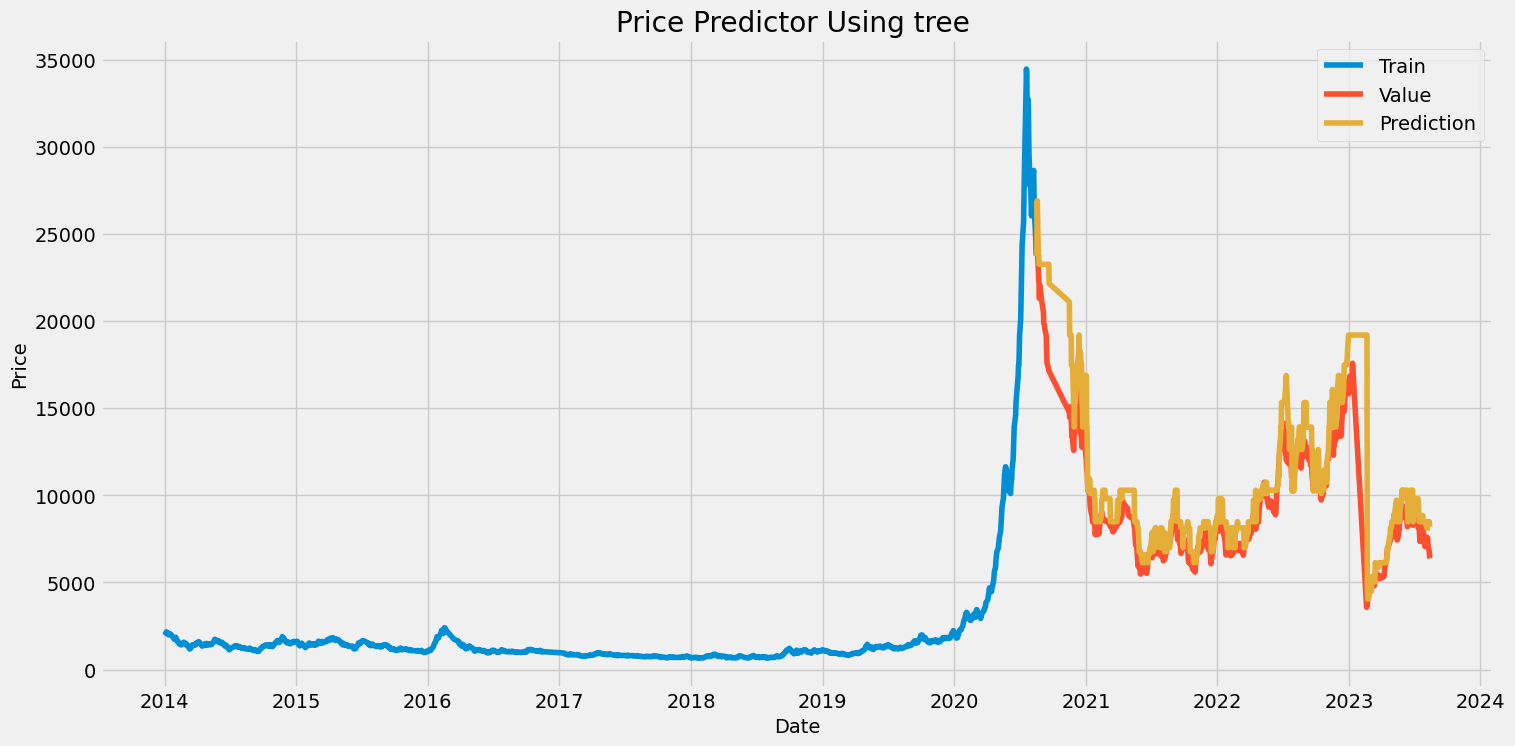

In [126]:
plt.figure(figsize=(16,8))
plt.title('Price Predictor Using tree ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Value','Prediction'])
plt.show()

In [125]:
from sklearn.metrics import r2_score
score = r2_score(valid['Close'], valid["Prediction"])
print("The accuracy of SVR model  is {}%".format(round(score, 2) *100))

The accuracy of SVR model  is 74.0%


In [117]:

tree=DecisionTreeRegressor().fit(xtrain,ytrain)
treered=tree.predict(xtest)

In [118]:
print('Tree Method Predictions : ' ,treered)

Tree Method Predictions :  [23760. 26910. 23760. 25640. 25640. 25640. 25640. 25640. 25640. 25640.
 25640. 25640. 21110. 21110. 21110. 20110. 20110. 20110. 20110. 18290.
 18290. 18290. 17490. 15330. 15330. 16880. 15330. 15330. 15330. 15330.
 15330. 15330. 15330. 15330. 15330. 16080. 16880. 17490. 17490. 17490.
 17490. 17490. 17490. 17490. 15330. 15330. 15330. 15330. 15330. 15330.
 15330. 15330. 15330. 15330. 15330. 15330. 12630. 12050. 12050. 10242.
 10242. 10600. 10747. 10938. 10105. 10292.  9284.  9284.  9284.  9284.
  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.
  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.
  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.
  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.
  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.  9284.
 10292. 10292. 10292. 10292. 10292. 10292. 10292. 10292. 10292. 10292.
 10292. 10292.  9284.  9284.  9284.  9284.  9284. 